# homework3
22210980119 于鹏

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

## Q1
#### (a)

In [115]:
investment1_prob = [0.94, 0.03, 0.03]
investment1_loss = [-1, 2, 12]
investment2_prob = [0.94, 0.03, 0.03]
investment2_loss = [-1, 2, 12]

根据定义，$VaR_{\alpha}(x)=inf\{x:F(x)\geq \alpha\}$，可以转化为$VaR_{\alpha}(x)=inf\{x: \alpha - F(x)\leq 0\}$，而$F(x)$可以转化为各个离散点的概率之和，因此代码部分如下：

In [116]:
def cal_VaR(investment_prob, investment_loss, confidence_level):
    for cur_prob, cur_loss in zip(investment_prob, investment_loss):
        confidence_level -= cur_prob
        if confidence_level <= 0:
            print('investment的VaR是{VaR}'.format(VaR=cur_loss))
            break

In [117]:
cal_VaR(investment1_prob, investment1_loss, confidence_level=0.95)

investment的VaR是2


也即在95%的置信度上，VaR为2million

### (b)

首先可以写出累积分布函数

$\begin{equation}
	F(x) = \begin{cases}
	0, &x < -1 \\
	0.94, & -1 \le x <2 \\
	0.97, & 2 \le x <12 \\
	1, & 12 \le x
		   \end{cases}
\end{equation}$

然后可以求出$VaR_{\beta}(x)$

$\begin{equation}
	VaR_{\beta}(x) = \begin{cases}
	-1, &\beta \le 0.94 \\
	2, & 0.94 < \beta \le 0.97 \\
	12, &0.97 < \beta \le 1
		   \end{cases}
\end{equation}$

然后计算ES，$1/(1-0.95)*[2*(0.97-0.95)+12*(1-0.97)]=8.0$，也即ES为8million

In [147]:
1/(1-0.95)*(2*(0.97-0.95)+12*(1-0.97))

8.0

In [86]:
def cal_ES(investment_prob, investment_loss, confidence_level):
    res = 0
    out_of_onfidence = 1.0 - confidence_level
    for i in range(len(investment_prob) - 1, -1, -1):
        out_of_onfidence -= investment_prob[i]
        if out_of_onfidence >= 0:
            res += (investment_prob[i] * investment_loss[i])
        else:
            res += ((investment_prob[i] + out_of_onfidence) * investment_loss[i])
            break
    res = res / (1 - confidence_level)
    print('ES is %.3f' % (res))

In [ ]:
cal_ES(investment1_prob, investment1_loss, 0.95)

ES is 8.000


也即在95%的置信度上，ES为8million（其实感觉这个代码可能对一些边界情况有点问题，但写了就先不删了，虽然对本题目没问题，但还是以上面写出的VaR分布函数的计算结果为准）

### (c)
首先可以算出组合的联合概率分布

In [120]:
combined_res = {}
for cur_loss1, cur_prob1 in zip(investment1_loss, investment1_prob):
    for cur_loss2, cur_prob2 in zip(investment2_loss, investment2_prob):
        tmp = cur_loss1 + cur_loss2
        if tmp in combined_res.keys():
            combined_res[tmp] += cur_prob1 * cur_prob2
        else:
            combined_res[tmp] = cur_prob1 * cur_prob2
combined_res_tmp = sorted(combined_res.items(), key=lambda x:x[0])
combined_res = {}
for cur_res in combined_res_tmp:
    combined_res[cur_res[0]] = cur_res[1]
print(combined_res)

{-2: 0.8835999999999999, 1: 0.05639999999999999, 4: 0.0009, 11: 0.05639999999999999, 14: 0.0018, 24: 0.0009}


由此得到了两种产品组合的联合概率分布，可以看到一共有6种不同的可能结果，最小的loss为-2也即盈利2million，最大的loss为24也即亏损24million

首先可以写出累积分布函数

$\begin{equation}
	F(x) = \begin{cases}
	0, &x < -2 \\
	0.8836, & -2 \le x <1 \\
    0.94, & 1 \le x <4 \\
    0.9409, & 4 \le x <11 \\
	0.9973, & 11 \le x <14 \\
    0.9991, & 14 \le x < 24 \\
	1, & 24 \le x
		   \end{cases}
\end{equation}$

然后可以求出$VaR_{\beta}(x)$

$\begin{equation}
	VaR_{\beta}(x) = \begin{cases}
	-2, &\beta < 0.8836 \\
	1, & 0.8836 < \beta \le 0.94 \\
    4, & 0.94 < \beta \le 0.9409 \\
    11, & 0.9409 < \beta \le 0.9973 \\
    14, & 0.9973 < \beta \le 0.9991 \\
	24, &0.9991 < \beta \le 1
		   \end{cases}
\end{equation}$

In [121]:
combined_loss = list(combined_res.keys())
combined_prob = list(combined_res.values())
cal_VaR(combined_prob, combined_res, confidence_level=0.95)

investment的VaR是11


调用之前的函数，得到此时95%置信度的VaR为11million

### (d)
获得联合概率分布后，可以调用之前的cal_ES()函数求组合的ES

In [90]:
cal_ES(combined_prob, combined_loss, 0.95)

ES is 11.342


调用之前的函数，得到此时95%置信度的ES为11.342million，用$VaR_{\beta}(x)$的分布函数也是相同的结果

### (e)
根据如上计算，可知道上述两种投资各自的VaR是2million，ES是8million，组合起来后VaR是11million，ES是11.342million

对于subadditivity，需要满足$\rho(X+Y) \leq \rho(x) + \rho(Y)$，对于VaR有$11 > 2+2$，对于ES有$11.342 < 8+8$，所以可以看到VaR不满足subadditivity，而ES满足这个性质，这也与老师在课堂上讲的相吻合

## Q2

首先读取文件

In [123]:
original_data = pd.read_excel('HistoricalSimulation.xlsx')

In [124]:
original_data.columns.values

array(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Exch Rate', 'Adjusted', 'Unnamed: 8',
       'Unnamed: 9', 'Exch Rate.1', 'Adjusted.1', 'Unnamed: 12',
       'Unnamed: 13', 'Exch Rate.2', 'Adjusted.2'], dtype=object)

In [125]:
original_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Exch Rate,Adjusted,Unnamed: 8,Unnamed: 9,Exch Rate.1,Adjusted.1,Unnamed: 12,Unnamed: 13,Exch Rate.2,Adjusted.2
0,NaN,NaT,NaN,DJIA,NaN,FTSE-100,USD/GBP,FTSE-500,NaN,CAC-40,EUR/USD,CAC-40,NaN,Nikkei,YEN/USD,Nikkei
1,Day,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2006-08-07,NaN,11219.38,NaN,5828.8,1.9098,11131.84224,NaN,4956.34,0.7776,6373.894033,NaN,15154.06,115,131.774435
3,1,2006-08-08,NaN,11173.59,NaN,5818.1,1.9072,11096.28032,NaN,4967.95,0.7789,6378.16151,NaN,15464.66,115.08,134.381821
4,2,2006-08-09,NaN,11076.18,NaN,5860.5,1.9086,11185.3503,NaN,5025.15,0.7762,6474.040196,NaN,15656.59,115.17,135.943301


因为表中已经包含了使用exchange rate进行折算的列，所以先去除不需要的列

In [126]:
filtered_data = original_data.drop(labels=['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 5', 'Exch Rate', 'Unnamed: 8', 'Unnamed: 9',
    'Exch Rate.1', 'Unnamed: 12', 'Unnamed: 13', 'Exch Rate.2'
], axis=1)

In [127]:
filtered_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 3,Adjusted,Adjusted.1,Adjusted.2
0,NaN,NaT,DJIA,FTSE-500,CAC-40,Nikkei
1,Day,NaT,NaN,NaN,NaN,NaN
2,0,2006-08-07,11219.38,11131.84224,6373.894033,131.774435
3,1,2006-08-08,11173.59,11096.28032,6378.16151,134.381821
4,2,2006-08-09,11076.18,11185.3503,6474.040196,135.943301


然后去掉没有实际数据的前两行

In [128]:
filtered_data_1 = filtered_data.drop(labels=[0, 1], axis=0)

In [129]:
filtered_data_1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 3,Adjusted,Adjusted.1,Adjusted.2
2,0,2006-08-07,11219.38,11131.84224,6373.894033,131.774435
3,1,2006-08-08,11173.59,11096.28032,6378.16151,134.381821
4,2,2006-08-09,11076.18,11185.3503,6474.040196,135.943301
5,3,2006-08-10,11124.37,11016.70812,6357.485948,135.43809
6,4,2006-08-11,11088.02,11040.7297,6364.764458,134.100284


然后重新命名一下行索引，然后去掉Unnamed: 0这一列

In [130]:
filtered_data_1.index = filtered_data_1['Unnamed: 0'].tolist()
filtered_data_1.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
496    496
497    497
498    498
499    499
500    500
Name: Unnamed: 0, Length: 501, dtype: object

此时查看一下数据，已经变成了我们想要的形式

In [131]:
filtered_data_1.head()

,Unnamed: 1,Unnamed: 3,Adjusted,Adjusted.1,Adjusted.2
0,2006-08-07,11219.38,11131.84224,6373.894033,131.774435
1,2006-08-08,11173.59,11096.28032,6378.16151,134.381821
2,2006-08-09,11076.18,11185.3503,6474.040196,135.943301
3,2006-08-10,11124.37,11016.70812,6357.485948,135.43809
4,2006-08-11,11088.02,11040.7297,6364.764458,134.100284


最后修改一下列索引名

In [132]:
final_filtered_data = filtered_data_1.rename(columns={'Unnamed: 1':'Date', 'Unnamed: 3':'DJIA', 'Adjusted':'FTSE-500', 'Adjusted.1':'CAC-40', 'Adjusted.2':'Nikkei'})

In [133]:
final_filtered_data.head()

,Date,DJIA,FTSE-500,CAC-40,Nikkei
0,2006-08-07,11219.38,11131.84224,6373.894033,131.774435
1,2006-08-08,11173.59,11096.28032,6378.16151,134.381821
2,2006-08-09,11076.18,11185.3503,6474.040196,135.943301
3,2006-08-10,11124.37,11016.70812,6357.485948,135.43809
4,2006-08-11,11088.02,11040.7297,6364.764458,134.100284


In [134]:
amounted_invested = [3500.0, 3000.0, 1500.0, 2000.0]
total_invested = 10000.0

根据note7，使用$v_n*\frac{v_i}{v_{i-1}}$对第二天的value进行估算，因此编写函数cal_tomorrow_value进行计算，一次可以对一列数据进行计算，使用.shift()函数来移动一位，作为分子，最后去掉nan的值（一列501个数据，错位相除后只会得到500个有效结果）

In [135]:
def cal_tomorrow_value(df, column_name):
    today_value = df.loc[500, column_name]
    tmp = df.shift(-1).loc[:, column_name] / df.loc[:, column_name]
    return tmp.dropna() * today_value

In [136]:
tomorrow_DIJA = cal_tomorrow_value(final_filtered_data, 'DJIA')
tomorrow_FTSE = cal_tomorrow_value(final_filtered_data, 'FTSE-500')
tomorrow_CAC = cal_tomorrow_value(final_filtered_data, 'CAC-40')
tomorrow_Nikkei = cal_tomorrow_value(final_filtered_data, 'Nikkei')

之后计算loss，首先需要根据9月25日的资产情况，计算出每种产品的share，从而计算第二天也即tomorrow的资产，进而得到loss

In [137]:
def cal_loss(df, tomorrow_DIJA, tomorrow_FTSE, tomorrow_CAC, tomorrow_Nikkei, amounted_invested, total_invested):
    today_value = []
    num_shares = []
    column_names = ['DJIA', 'FTSE-500', 'CAC-40', 'Nikkei']
    for i, column_name in enumerate(column_names):
        today_value.append(df.loc[500, column_name])
        num_shares.append(amounted_invested[i] / today_value[i])
    
    portfolio_value = tomorrow_DIJA * num_shares[0] + tomorrow_FTSE * num_shares[1] + \
        tomorrow_CAC * num_shares[2] + tomorrow_Nikkei * num_shares[3]
    loss = total_invested - portfolio_value
    return portfolio_value, loss



In [138]:
portfolio_value, loss = cal_loss(final_filtered_data, tomorrow_DIJA, tomorrow_FTSE, tomorrow_CAC, tomorrow_Nikkei, amounted_invested, total_invested)

In [139]:
loss_list = list(loss)

In [140]:
loss_list.sort(reverse=True)

查看一下降序排列的loss的情况：

In [141]:
loss_list[:10]

[492.1868134440265,
 365.021066484931,
 292.96889631005615,
 269.5542730767884,
 257.1784816018953,
 219.99831318976976,
 216.8018201690429,
 200.72430198783877,
 198.20209435039396,
 196.19116778457828]

In [2]:
# num_shares = [4000/11022.06, 3000/9599.90, 1000/6200.40, 2000/112.82]
# value = [11022.06*(11173.59/11219.38), 9599.9*(11096.28/11131.84), 6200.4*(6378.16/6373.89), 112.82*(134.38/131.77)]

In [3]:
# value

[10977.075328173216, 9569.233691105874, 6204.553775480906, 115.05465280412838]

In [4]:
# np.sum(np.asarray(value) * np.asarray(num_shares))

10014.375756196576

根据note，取第六个作为VaR，也即219998，然后取前六个数字的均值作为ES

In [111]:
np.mean(loss_list[:6])

316.1513073512445

In [28]:
219.998 * np.sqrt(8)

622.2483105899123

In [112]:
316.151 * np.sqrt(8)

894.2100639156329

计算出1-day的结果后，乘以$\sqrt{8}$得到8-day结果，由此可以得到置信度99%下的8-day VaR是622248，ES是894210

### Q3

In [30]:
assumed_notional_principal = 100.0  # 设置债券面值为100元
coupon = 0.06
credit_spread = 0.015  # yield - risk_free_rate = 0.015
risk_free_rate = 0.035
recovery_rate = 0.4
interval_year = 0.5  # 也即6个月

在本题目中，default time和获得credit payment的时刻是能够一一对应的，因为都是每半年一次，所以就只用default_time这个列表来存储时刻

In [79]:
default_time = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
payment_to_go = coupon * interval_year * assumed_notional_principal

In [80]:
payment_to_go

3.0

也就是每半年coupon能获得3元

然后计算在各个default time下，相应的expected value of the default-free bond

In [81]:
expected_value = []
for i in default_time:
    cur_expected_value = 0.0
    j = i
    while j <= 3.0:
        if j != 3.0:
            cur_expected_value += (payment_to_go * np.exp(-1 * risk_free_rate * (j - i)))
        else:
            cur_expected_value += (payment_to_go + assumed_notional_principal) * np.exp(-1 * risk_free_rate * (j - i))
        j += 0.5
    expected_value.append(cur_expected_value)

In [82]:
expected_value

[108.85906115869356,
 107.727899369248,
 106.57676802451545,
 105.40531458152456,
 104.21318027350254,
 103.0]

由此计算出了在各个default time下，相应的expected value of the default-free bond

In [83]:
loss = np.asarray(expected_value) - recovery_rate * assumed_notional_principal

In [84]:
loss

array([68.85906116, 67.72789937, 66.57676802, 65.40531458, 64.21318027,
       63.        ])

减掉可以recover的部分后，得到了各个default time的loss，之后计算discount factor折现到初始时刻

In [85]:
discount_factor = []
for i, cur_time in enumerate(default_time):
    discount_factor.append(np.exp(-1 * risk_free_rate * default_time[i]))

In [86]:
pv_of_expected_loss = np.asarray(discount_factor) * loss

接下来开始进行step3，计算credit spread payments

In [87]:
credit_payment = credit_spread * interval_year * assumed_notional_principal

In [88]:
credit_payment

0.75

也即每6个月获得0.75

然后计算present value：

In [89]:
present_value = 0.0
for cur_time in default_time:
    present_value += (credit_payment * np.exp(-1 * risk_free_rate * cur_time))

In [90]:
present_value

4.2345368903411496

In [91]:
Q = present_value / pv_of_expected_loss.sum()

In [92]:
Q

0.011359593306859112

因为一年可以default两次，所以上面这个Q实际上是半年的概率，每年的违约概率应该是2Q，因此可以得到final_Q

In [93]:
final_Q = Q * 2
final_Q

0.022719186613718224

因此本题目的解答为：求解出的PD为2.27%

此外，试着用近似公式$S/(1-R)$来估算，发现确实比较相近

In [94]:
approximation_Q = credit_spread / (1 - recovery_rate)

In [95]:
approximation_Q

0.025

## Q4
证明过程如下2张图所示

In [120]:
img1 = Image.open('part1.png')
img2 = Image.open('part2.png')

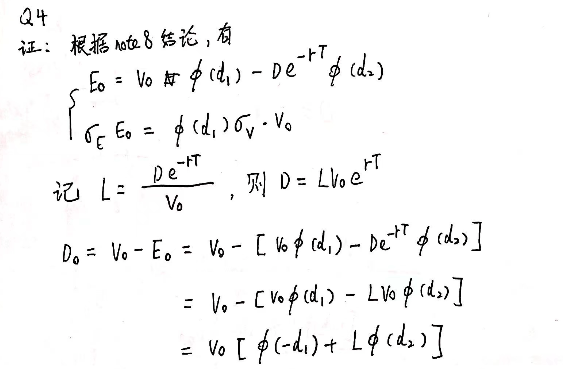

In [121]:
img1

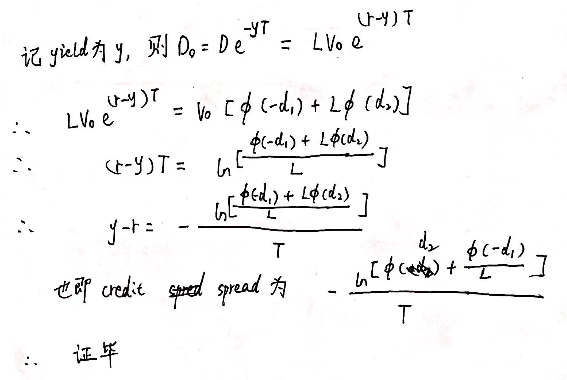

In [122]:
img2